In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import ast


In [2]:
import pandas as pd
import os


movie_columns = [
    'Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 
    'Movie languages', 'Movie countries', 'Movie genres'
]

chemin_movie_tsv = os.path.join(os.getcwd(), 'MovieSummaries', 'MovieSummaries', 'movie.metadata.tsv')


movie_metadata= pd.read_csv(chemin_movie_tsv, sep='\t', names=movie_columns)
additional_dataset = pd.read_csv('horror_movies.csv')

In [3]:
chemin_character_tsv = os.path.join(os.getcwd(), 'MovieSummaries', 'MovieSummaries', 'character.metadata.tsv')
character_columns = [
   'Wikipedia movie ID', 'Freebase Movie ID', 'Movie release date','Character Name', 'Actor DOB', 'Actor gender', 'Actor height', 'Actor ethnicity', 
    'Actor Name', 'Actor age at movie release', 'Freebase character map1', 'Freebase character map2', 'Freebase character map3'
]
character_metadata= pd.read_csv(chemin_character_tsv, sep='\t', names = character_columns)

In [4]:
actors_and_movies = pd.merge(movie_metadata, character_metadata, on=['Wikipedia movie ID', 'Movie release date'], how='left')

In [5]:
# Fonction pour extraire la langue depuis une chaîne de type dictionnaire
def extract_language(language_str):
    try:
        # Vérifie si la chaîne n'est pas vide ou n'est pas un dictionnaire vide
        if language_str and language_str != "{}":
            # Convertit la chaîne en dictionnaire
            language_dict = ast.literal_eval(language_str)
            # Récupère la première valeur du dictionnaire et prend le premier mot
            language = next(iter(language_dict.values())).split()[0]
            return language
        else:
            # Si la chaîne est vide ou un dictionnaire vide, retourne None
            return None
    except (ValueError, SyntaxError, AttributeError, StopIteration):
        # En cas d'erreur, retourne None
        return None

def extract_country(language_str):
    try:
        # Vérifie si la chaîne n'est pas vide ou n'est pas un dictionnaire vide
        if language_str and language_str != "{}":
            # Convertit la chaîne en dictionnaire
            language_dict = ast.literal_eval(language_str)
            # Récupère la première valeur du dictionnaire et prend le premier mot
            language = next(iter(language_dict.values()))
            return language
        else:
            # Si la chaîne est vide ou un dictionnaire vide, retourne None
            return None
    except (ValueError, SyntaxError, AttributeError, StopIteration):
        # En cas d'erreur, retourne None
        return None


# Applique la fonction à la colonne "Movie languages"
actors_and_movies["Movie languages"] = actors_and_movies["Movie languages"].apply(extract_language)
actors_and_movies["Movie countries"] = actors_and_movies["Movie countries"].apply(extract_country)

In [6]:
def extract_genres(genre_str):
    try:
        # Vérifie si la chaîne n'est pas vide ou un dictionnaire vide
        if genre_str and genre_str != "{}":
            # Convertit la chaîne en dictionnaire
            genre_dict = ast.literal_eval(genre_str)
            # Récupère tous les genres et les combine en une chaîne
            genres = ", ".join(value for value in genre_dict.values())
            return genres
        else:
            # Si la chaîne est vide ou un dictionnaire vide, retourne None
            return None
    except (ValueError, SyntaxError, AttributeError):
        # En cas d'erreur, retourne None
        return None

# Applique la fonction à la colonne "Movie genres"
actors_and_movies["Movie genres"] = actors_and_movies["Movie genres"].apply(extract_genres)

In [7]:
actors_and_movies['Movie name'] = actors_and_movies['Movie name'].str.replace(r'^[!#]+', '', regex=True)

def contains_horror(genres):
    if genres is None:
        return False
    genre_list = [genre.strip() for genre in genres.split(',')]  # Nettoyer les espaces
    return 'Horror' in genre_list

horror_movies = actors_and_movies[actors_and_movies['Movie genres'].apply(contains_horror)]

non_horror_movies = actors_and_movies[~actors_and_movies['Movie genres'].apply(contains_horror)]


In [8]:
import pandas as pd

# Fonction de conversion des dates, inchangée
def convert_date(date):
    try:
        # Essayer de convertir directement
        return pd.to_datetime(date, errors='coerce')
    except:
        # Si l'erreur se produit, traiter comme une année
        if len(str(date)) == 4:  # Si la longueur de la date est de 4 chiffres, c'est probablement une année
            return pd.to_datetime(f"{date}-01-01", errors='coerce')
        return pd.NaT  # En cas d'échec

# Appliquer la conversion à la colonne 'Movie release date'
non_horror_movies['Movie release date'] = non_horror_movies['Movie release date'].apply(convert_date)
horror_movies['Movie release date'] = horror_movies['Movie release date'].apply(convert_date)

# Créer une nouvelle colonne 'release_year' en extrayant uniquement l'année
non_horror_movies['release_year'] = non_horror_movies['Movie release date'].dt.year
horror_movies['release_year'] = horror_movies['Movie release date'].dt.year


C:\Users\julie\AppData\Local\Temp\ipykernel_29676\724441490.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_horror_movies['Movie release date'] = non_horror_movies['Movie release date'].apply(convert_date)
C:\Users\julie\AppData\Local\Temp\ipykernel_29676\724441490.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_movies['Movie release date'] = horror_movies['Movie release date'].apply(convert_date)
C:\Users\julie\AppData\Local\Temp\ipykernel_29676\724441490.py:19: SettingWithCopyWarning:

In [9]:
ethnicity_dict={
    "/m/01kb9y": "Multiracial",
    "/m/05qb937": "Venezuelans",
    "/m/09v5bdn": "Puerto Ricans",
    "/m/02pfy17": "Syrian people",
    "/m/013xrm": "Germans",
    "/m/01n94b": "Slovaks",
    "/m/02w7gg": "English people",
    "/m/0x67": "African American",
    "/m/011bn6ys": None,
    "/m/0118b8ry": None,
    "/m/03bkbh": "Irish people",
    "/m/0318mh": "Finns",
    "/m/027hhf": "Arbëreshë people",
    "/m/04c28": "Kurds",
    "/m/0cx3p": "Berbers",
    "/m/032j30": "Native Hawaiians",
    "/m/0gcp7x": "Iranian Azerbaijanis",
    "/m/013xrm": "Germans",
    "/m/038723": "Greek American",
    "/m/0d2by": "Chinese American",
    "/m/09vc4s": "English American",
    "/m/0912ll": "Dominican American",
    "/m/07mqps": "Dutch-American",
    "/m/01qhm_": "German American",
    "/m/0dbxy": "Cherokee",
    "/m/013s41": "Bulgarians",
    "/m/01km_m": "Slovenes",
    "/m/02ctzb": "White people",
    "/m/033tf_": "Irish American",
    "/m/0222qb": "Italian people",
    "/m/0jt85pd": "Greeks",
    "/m/03w9xlf": "Filipino Italian",
    "/m/0j251_s": "Arabs in France",
    "/m/0bwhd5z": "Harari people",
    "/m/0k0t_dz": "Caucasian race",
    "/m/09743": "Pashtun",
    "/m/03lmx1": "Scottish people",
    "/m/0bpjh3": "Bengalis",
    "/m/0j63_pr": "French Canadian American",
    "/m/0jt8h6f": "Latin Americans",
    "/m/02gx2x": "Javanese people",
    "/m/048z7l": "Jewish American",
    "/m/03ts0c": "French people",
    "/m/013s3n": "Czechs",
    "/m/0268_k": "Danes",
    "/m/059_w": "Native Americans in the United States",
    "/m/09kr66": "Russian American",
    "/m/0f3v0": "Comanche",
    "/m/09743": "Pashtun",
    "/m/09vc4s": "English American",
    "/m/0bpjh3": "Bengalis",
    "/m/0x67": "African American",
    "/m/0j3c70b": "Jamaicans",
    "/m/0dryh9k": "Indian people",
    "/m/09vc4s": "English American",
    "/m/0dbxy": "Cherokee",
    "/m/03bkbh": "Irish people",
    "/m/02pfy17": "Syrian people",
    "/m/0cx3p": "Berbers",
    "/m/03bkbh": "Irish people",
    "/m/02ctzb": "White people",
    "/m/02w7gg": "English people",
    "/m/033tf_": "Irish American",
    "/m/09vc4s": "English American",
    "/m/0bwhd5z": "Harari people",
    "/m/0k0t_dz": "Caucasian race",
    "/m/013xrm": "Germans",
    "/m/09743": "Pashtun",
    "/m/03w9xlf": "Filipino Italian",
    "/m/0j251_s": "Arabs in France",
    "/m/04c28": "Kurds",
    "/m/0j63_pr": "French Canadian American",
    "/m/038723": "Greek American",
    "/m/0134vqyy": "Scottish American",
    "/m/0dbxy": "Cherokee",
    "/m/05qb937": "Venezuelans",
    "/m/033tf_": "Irish American",
    "/m/03bkbh": "Irish people",
    "/m/04c28": "Kurds",
    "/m/0j251_s": "Arabs in France",
    "/m/0bpjh3": "Bengalis",
    "/m/0dbxy": "Cherokee",
    "/m/038723": "Greek American"
}

horror_movies['real ethnicity'] = horror_movies['Actor ethnicity'].map(ethnicity_dict)
non_horror_movies['real ethnicity'] = non_horror_movies['Actor ethnicity'].map(ethnicity_dict)


C:\Users\julie\AppData\Local\Temp\ipykernel_29676\2614402443.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_movies['real ethnicity'] = horror_movies['Actor ethnicity'].map(ethnicity_dict)
C:\Users\julie\AppData\Local\Temp\ipykernel_29676\2614402443.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_horror_movies['real ethnicity'] = non_horror_movies['Actor ethnicity'].map(ethnicity_dict)


# 1. Comparaison all movies vs horror movies

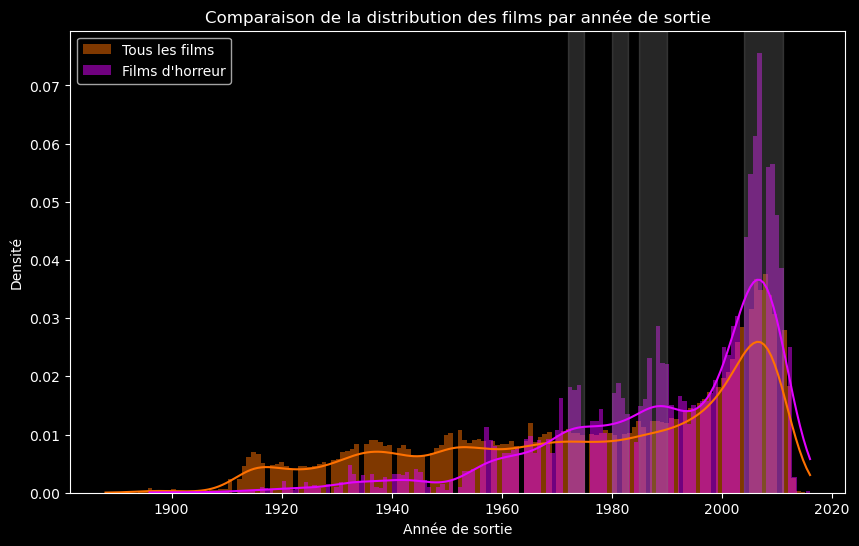

Statistique du test KS: 0.2174825210594137
P-value du test KS: 2.50603073497939e-193
Les distributions sont significativement différentes.


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Regrouper par 'Movie name' et 'Movie release date' pour éviter les duplications dues aux multiples acteurs
non_horror_movies_unique = non_horror_movies.groupby(['Movie name', 'release_year'], as_index=False).first()
horror_movies_unique = horror_movies.groupby(['Movie name', 'release_year'], as_index=False).first()

# Définir une palette de couleurs personnalisée
custom_palette = ["#ff7100", "#fd9702", "#e102ff", "#ae03ff", "#000000"]

# Utiliser le style sombre pour la visualisation
plt.style.use('dark_background')

# Initialiser la figure
plt.figure(figsize=(10, 6))

# Tracer l'histogramme des années de sortie des films non-horreur
sns.histplot(non_horror_movies_unique['release_year'].dropna(), bins=150, kde=True, color=custom_palette[0], label="Tous les films", stat='density', linewidth=2, edgecolor=None)

# Tracer l'histogramme des années de sortie des films d'horreur
sns.histplot(horror_movies_unique['release_year'].dropna(), bins=150, kde=True, color=custom_palette[2], label="Films d'horreur", stat='density', linewidth=2, edgecolor=None)

# Ajouter des zones ombrées pour les périodes spécifiques
plt.axvspan(2004, 2011, color='grey', alpha=0.3)  
plt.axvspan(1985, 1990, color='grey', alpha=0.3)  
plt.axvspan(1980, 1983, color='grey', alpha=0.3)  
plt.axvspan(1972, 1975, color='grey', alpha=0.3)  

# Titre et étiquettes des axes
plt.title('Comparaison de la distribution des films par année de sortie', color='white')
plt.xlabel('Année de sortie', color='white')
plt.ylabel('Densité', color='white')

# Ajouter la légende
plt.legend()

# Afficher le graphique
plt.show()

# Calculer la statistique de test de Kolmogorov-Smirnov
ks_statistic, p_value = stats.ks_2samp(non_horror_movies_unique['release_year'].dropna(), horror_movies_unique['release_year'].dropna())

# Afficher les résultats du test
print(f"Statistique du test KS: {ks_statistic}")
print(f"P-value du test KS: {p_value}")

# Tester la significativité de la différence des distributions
alpha = 0.05  
if p_value < alpha:
    print("Les distributions sont significativement différentes.")
else:
    print("Les distributions ne sont pas significativement différentes.")


C:\Users\julie\AppData\Local\Temp\ipykernel_29676\1684878977.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  horror_movies['Movie countries'].fillna('', inplace=True)
C:\Users\julie\AppData\Local\Temp\ipykernel_29676\1684878977.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

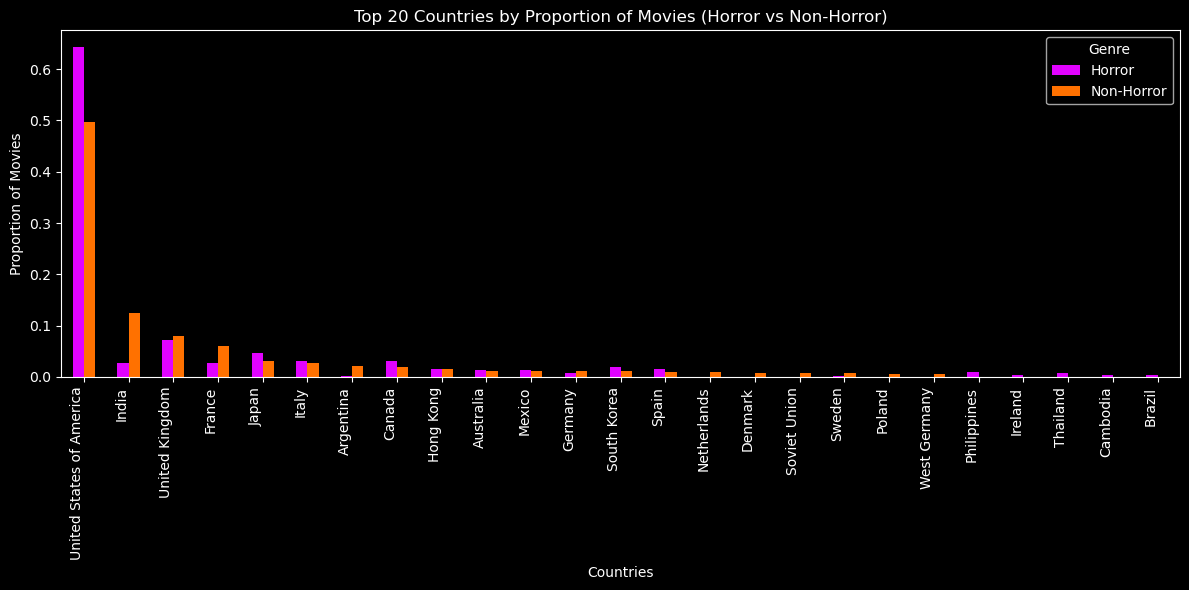

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que les DataFrames sont déjà chargés dans 'horror_movies' et 'non_horror_movies'

# Remplacer les valeurs manquantes dans 'Movie countries' par une chaîne vide avant de grouper
horror_movies['Movie countries'].fillna('', inplace=True)
non_horror_movies['Movie countries'].fillna('', inplace=True)

# Filtrer les films dont 'Movie countries' n'est pas vide
horror_movies_filtered = horror_movies[horror_movies['Movie countries'] != '']
non_horror_movies_filtered = non_horror_movies[non_horror_movies['Movie countries'] != '']

# Grouper par 'Movie name' et 'release_year', puis joindre les pays uniques
horror_movies_grouped = horror_movies_filtered.groupby(['Movie name', 'release_year'])['Movie countries'].apply(lambda x: ', '.join(x.unique())).reset_index()

# Faire de même pour les films non-horreur
non_horror_movies_grouped = non_horror_movies_filtered.groupby(['Movie name', 'release_year'])['Movie countries'].apply(lambda x: ', '.join(x.unique())).reset_index()

# Compter le nombre de films par pays pour chaque DataFrame
horror_country_counts = horror_movies_grouped['Movie countries'].str.split(', ').explode().value_counts()
non_horror_country_counts = non_horror_movies_grouped['Movie countries'].str.split(', ').explode().value_counts()

# Calculer la proportion de chaque pays par rapport au total de films dans chaque genre
total_horror_movies = horror_movies_grouped['Movie name'].nunique()  # Nombre total de films d'horreur
total_non_horror_movies = non_horror_movies_grouped['Movie name'].nunique()  # Nombre total de films non-horreur

horror_country_proportions = horror_country_counts / total_horror_movies
non_horror_country_proportions = non_horror_country_counts / total_non_horror_movies

# Sélectionner les 20 pays les plus fréquents
top_horror_countries = horror_country_proportions.head(20)
top_non_horror_countries = non_horror_country_proportions.head(20)

# Fusionner les deux séries pour faciliter la comparaison
df_comparison = pd.DataFrame({
    'Horror': top_horror_countries,
    'Non-Horror': top_non_horror_countries
}).fillna(0)  # Remplir les valeurs manquantes avec 0 si un pays n'est pas présent dans les deux DataFrames

# Trier le DataFrame par les proportions des films non-horreur (colonne 'Non-Horror')
df_comparison = df_comparison.sort_values(by='Non-Horror', ascending=False)

# Tracer l'histogramme comparatif
ax = df_comparison.plot(kind='bar', figsize=(12, 6), color=[custom_palette[2], custom_palette[0]])
ax.set_xlabel('Countries')
ax.set_ylabel('Proportion of Movies')
ax.set_title('Top 20 Countries by Proportion of Movies (Horror vs Non-Horror)')
ax.legend(title='Genre')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


# 2. Actors

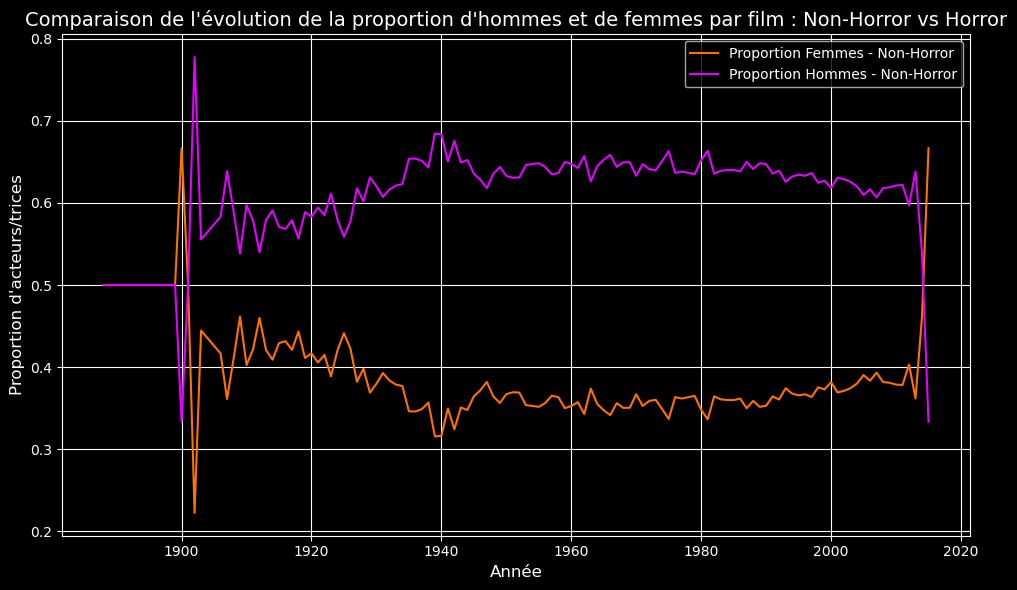

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Définir la palette de couleurs
custom_palette = ["#ff7100", "#fd9702", "#e102ff", "#ae03ff", "#000000"]

# Supposons que non_horror_actors et horror_actors sont vos DataFrames

# Filtrer les actrices et les acteurs dans non-horror et horror
df_femmes_non_horror = non_horror_movies[non_horror_movies['Actor gender'] == 'F']
df_hommes_non_horror = non_horror_movies[non_horror_movies['Actor gender'] == 'M']
df_femmes_horror = horror_movies[horror_movies['Actor gender'] == 'F']
df_hommes_horror = horror_movies[horror_movies['Actor gender'] == 'M']

# Regrouper par année et par film pour les actrices et les acteurs non-horror et compter le nombre d'acteurs par film
femmes_non_horror_par_film = df_femmes_non_horror.groupby(['release_year', 'Movie name'])['Actor Name'].count().reset_index(name='Females Count')
hommes_non_horror_par_film = df_hommes_non_horror.groupby(['release_year', 'Movie name'])['Actor Name'].count().reset_index(name='Males Count')

# Calculer le nombre total d'acteurs pour les films non-horror
total_non_horror_par_film = femmes_non_horror_par_film.merge(hommes_non_horror_par_film, on=['release_year', 'Movie name'])
total_non_horror_par_film['Total Count'] = total_non_horror_par_film['Females Count'] + total_non_horror_par_film['Males Count']

# Calculer la proportion de femmes et d'hommes pour les films non-horror
total_non_horror_par_film['Proportion Femmes'] = total_non_horror_par_film['Females Count'] / total_non_horror_par_film['Total Count']
total_non_horror_par_film['Proportion Hommes'] = total_non_horror_par_film['Males Count'] / total_non_horror_par_film['Total Count']

# Regrouper par année et calculer la moyenne des proportions de femmes et d'hommes pour non-horror
moyenne_proportion_femmes_non_horror = total_non_horror_par_film.groupby('release_year')['Proportion Femmes'].mean().reset_index()
moyenne_proportion_hommes_non_horror = total_non_horror_par_film.groupby('release_year')['Proportion Hommes'].mean().reset_index()

# Regrouper par année et par film pour les actrices et les acteurs d'horreur
femmes_horror_par_film = df_femmes_horror.groupby(['release_year', 'Movie name'])['Actor Name'].count().reset_index(name='Females Count')
hommes_horror_par_film = df_hommes_horror.groupby(['release_year', 'Movie name'])['Actor Name'].count().reset_index(name='Males Count')

# Calculer le nombre total d'acteurs pour les films d'horreur
total_horror_par_film = femmes_horror_par_film.merge(hommes_horror_par_film, on=['release_year', 'Movie name'])
total_horror_par_film['Total Count'] = total_horror_par_film['Females Count'] + total_horror_par_film['Males Count']

# Calculer la proportion de femmes et d'hommes pour les films d'horreur
total_horror_par_film['Proportion Femmes'] = total_horror_par_film['Females Count'] / total_horror_par_film['Total Count']
total_horror_par_film['Proportion Hommes'] = total_horror_par_film['Males Count'] / total_horror_par_film['Total Count']

# Regrouper par année et calculer la moyenne des proportions de femmes et d'hommes pour horror
moyenne_proportion_femmes_horror = total_horror_par_film.groupby('release_year')['Proportion Femmes'].mean().reset_index()
moyenne_proportion_hommes_horror = total_horror_par_film.groupby('release_year')['Proportion Hommes'].mean().reset_index()

# Tracer l'évolution de la proportion d'hommes et de femmes par film au cours des années
plt.figure(figsize=(10, 6))

# Tracer la courbe pour la proportion de femmes dans les films non-horror
plt.plot(moyenne_proportion_femmes_non_horror['release_year'], moyenne_proportion_femmes_non_horror['Proportion Femmes'], color=custom_palette[0], linestyle='-', markersize=5, label='Proportion Femmes - Non-Horror')


# Tracer la courbe pour la proportion d'hommes dans les films non-horror
plt.plot(moyenne_proportion_hommes_non_horror['release_year'], moyenne_proportion_hommes_non_horror['Proportion Hommes'], color=custom_palette[2], linestyle='-', markersize=5, label='Proportion Hommes - Non-Horror')


# Ajouter des titres et labels
plt.title("Comparaison de l'évolution de la proportion d'hommes et de femmes par film : Non-Horror vs Horror", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Proportion d'acteurs/trices", fontsize=12)
plt.grid(True)

# Ajouter la légende pour distinguer les courbes
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()


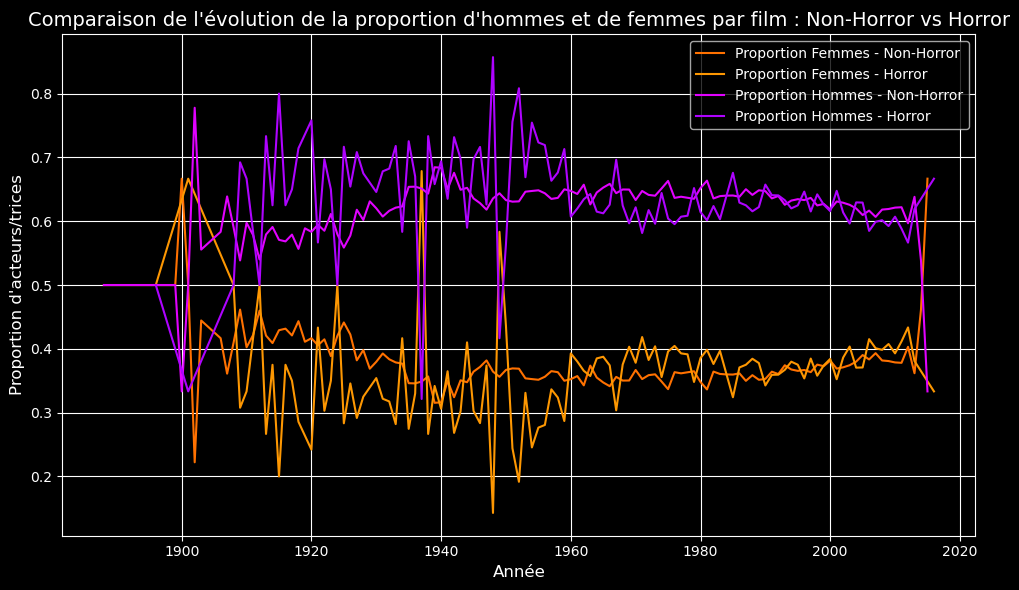

In [13]:
# Tracer l'évolution de la proportion d'hommes et de femmes par film au cours des années
plt.figure(figsize=(10, 6))

# Tracer la courbe pour la proportion de femmes dans les films non-horror
plt.plot(moyenne_proportion_femmes_non_horror['release_year'], moyenne_proportion_femmes_non_horror['Proportion Femmes'], color=custom_palette[0], linestyle='-', markersize=5, label='Proportion Femmes - Non-Horror')

# Tracer la courbe pour la proportion de femmes dans les films d'horreur
plt.plot(moyenne_proportion_femmes_horror['release_year'], moyenne_proportion_femmes_horror['Proportion Femmes'], color=custom_palette[1], linestyle='-', markersize=5, label='Proportion Femmes - Horror')

# Tracer la courbe pour la proportion d'hommes dans les films non-horror
plt.plot(moyenne_proportion_hommes_non_horror['release_year'], moyenne_proportion_hommes_non_horror['Proportion Hommes'], color=custom_palette[2], linestyle='-', markersize=5, label='Proportion Hommes - Non-Horror')

# Tracer la courbe pour la proportion d'hommes dans les films d'horreur
plt.plot(moyenne_proportion_hommes_horror['release_year'], moyenne_proportion_hommes_horror['Proportion Hommes'], color=custom_palette[3], linestyle='-', markersize=5, label='Proportion Hommes - Horror')

# Ajouter des titres et labels
plt.title("Comparaison de l'évolution de la proportion d'hommes et de femmes par film : Non-Horror vs Horror", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Proportion d'acteurs/trices", fontsize=12)
plt.grid(True)

# Ajouter la légende pour distinguer les courbes
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()


C:\Users\julie\AppData\Local\Temp\ipykernel_29676\1433937289.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_actors_clean['Movie Type'] = 'Horror'
C:\Users\julie\AppData\Local\Temp\ipykernel_29676\1433937289.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_horror_actors_clean['Movie Type'] = 'Non Horror'
C:\Users\julie\AppData\Local\Temp\ipykernel_29676\1433937289.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

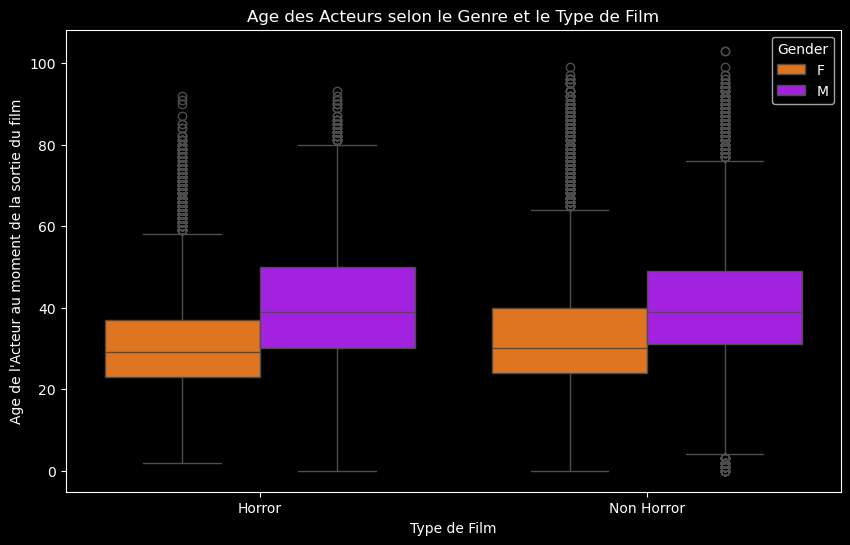

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les lignes avec des âges négatifs dans chaque DataFrame
horror_actors_clean = horror_movies[horror_movies['Actor age at movie release'] >= 0]
non_horror_actors_clean = non_horror_movies[non_horror_movies['Actor age at movie release'] >= 0]

# Créer une colonne pour le type de film (horreur ou non horreur)
horror_actors_clean['Movie Type'] = 'Horror'
non_horror_actors_clean['Movie Type'] = 'Non Horror'

# Ajouter une colonne 'Gender' pour indiquer le sexe de l'acteur
horror_actors_clean['Gender'] = horror_actors_clean['Actor gender']
non_horror_actors_clean['Gender'] = non_horror_actors_clean['Actor gender']

# Fusionner les deux DataFrames
all_actors_clean = pd.concat([horror_actors_clean[['Actor age at movie release', 'Gender', 'Movie Type']], 
                              non_horror_actors_clean[['Actor age at movie release', 'Gender', 'Movie Type']]])

# Réinitialiser l'indice du DataFrame fusionné pour éviter des problèmes de duplications d'indices
all_actors_clean.reset_index(drop=True, inplace=True)

# Créer un box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='Movie Type', y='Actor age at movie release', hue='Gender', data=all_actors_clean, palette={'M': custom_palette[3], 'F': custom_palette[0]})

# Ajouter un titre et des labels
plt.title('Age des Acteurs selon le Genre et le Type de Film')
plt.xlabel('Type de Film')
plt.ylabel('Age de l\'Acteur au moment de la sortie du film')

# Afficher le plot
plt.show()


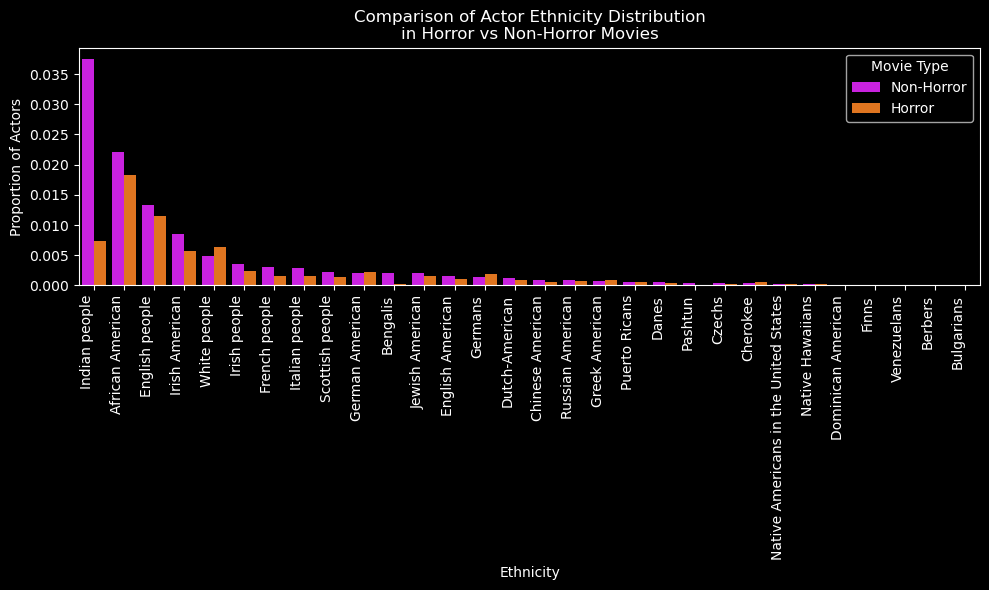

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# On suppose que 'non_horror_actors' et 'horror_actors' sont déjà chargés dans votre environnement.

# Extraction des ethnicités les plus fréquentes (10 premiers)
top_ethnicities_non_horror = non_horror_movies['real ethnicity'].value_counts().head(30)
top_ethnicities_horror = horror_movies['real ethnicity'].value_counts().head(30)

# Normalisation des fréquences
total_non_horror = non_horror_movies.shape[0]
total_horror = horror_movies.shape[0]

# Calcul des proportions
proportions_non_horror = top_ethnicities_non_horror / total_non_horror
proportions_horror = top_ethnicities_horror / total_horror

# Assurer que les deux séries ont les mêmes indices (ethnies) et compléter les valeurs manquantes avec 0
proportions_horror = proportions_horror.reindex(proportions_non_horror.index, fill_value=0)

# Création d'un DataFrame pour faciliter la visualisation
ethnicities_comparison = pd.DataFrame({
    'real ethnicity': proportions_non_horror.index,
    'Non-Horror': proportions_non_horror.values,
    'Horror': proportions_horror.values
})

# Reformatage pour un barplot avec seaborn
ethnicities_comparison = ethnicities_comparison.melt(id_vars="real ethnicity", 
                                                     value_vars=["Non-Horror", "Horror"],
                                                     var_name="Movie Type", 
                                                     value_name="Proportion")

# Visualisation avec un barplot
plt.figure(figsize=(10, 6))
sns.barplot(x="real ethnicity", y="Proportion", hue="Movie Type", data=ethnicities_comparison, palette=[custom_palette[2], custom_palette[0]])
plt.title("Comparison of Actor Ethnicity Distribution\nin Horror vs Non-Horror Movies")
plt.xlabel("Ethnicity")
plt.ylabel("Proportion of Actors")
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()


# 3. Tropes

In [16]:
tvtropes_tsv = os.path.join(os.getcwd(), 'MovieSummaries', 'MovieSummaries', 'tvtropes.clusters.txt')
tv_tropes_columns = ['Character type', 'Description']
tv_tropes= pd.read_csv(tvtropes_tsv, sep='\t', names=tv_tropes_columns)

In [17]:
tv_tropes['Description'][0]

'{"char": "Professor Philip Brainard", "movie": "Flubber", "id": "/m/0jy9q0", "actor": "Robin Williams"}'

In [18]:
import json

# Fonction pour convertir la chaîne JSON en dictionnaire
def parse_json_column(description):
    return json.loads(description)

# Appliquer cette fonction pour transformer la colonne 'Description'
parsed_data = tv_tropes['Description'].apply(parse_json_column)

# Créer des nouvelles colonnes à partir des données extraites
tv_tropes = pd.concat([tv_tropes, parsed_data.apply(pd.Series)], axis=1)

tv_tropes = tv_tropes.rename(columns={
    'char': 'Character Name',
    'movie': 'Movie title',
    'id': 'ID',
    'actor': 'Actor'
})

In [19]:
# Fusionner les DataFrames sur 'Movie name' et 'Actor Name'
horror_movies = pd.merge(horror_movies, tv_tropes[['Movie title', 'Actor', 'Character type']], 
                          left_on=['Movie name', 'Actor Name'], 
                          right_on=['Movie title', 'Actor'], 
                          how='left')

In [20]:
non_horror_movies = pd.merge(non_horror_movies, tv_tropes[['Movie title', 'Actor', 'Character type']], 
                          left_on=['Movie name', 'Actor Name'], 
                          right_on=['Movie title', 'Actor'], 
                          how='left')

In [26]:
horror_movies['Character type'].value_counts()

Character type
final_girl                     5
dumb_blonde                    3
corrupt_corporate_executive    3
egomaniac_hunter               2
crazy_jealous_guy              2
father_to_his_men              2
klutz                          1
henpecked_husband              1
master_swordsman               1
coward                         1
jerk_jock                      1
broken_bird                    1
heartbroken_badass             1
valley_girl                    1
brainless_beauty               1
slacker                        1
bromantic_foil                 1
granola_person                 1
bruiser_with_a_soft_center     1
ophelia                        1
cultured_badass                1
charmer                        1
absent_minded_professor        1
crazy_survivalist              1
stoner                         1
morally_bankrupt_banker        1
bully                          1
Name: count, dtype: int64

In [28]:
horror_movies[horror_movies['Character type']=='dumb_blonde']

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Freebase Movie ID,...,Actor Name,Actor age at movie release,Freebase character map1,Freebase character map2,Freebase character map3,release_year,real ethnicity,Movie title,Actor,Character type
9031,2486990,/m/07h9gp,Scary Movie 4,2006-04-12,NaN,89.0,English,United States of America,"Parody, Horror, Absurdism, Gross-out film, Com...",/m/07h9gp,...,Anna Faris,29.0,/m/0k2y_7,/m/0g3h_5,/m/01pk3z,2006.0,NaN,Scary Movie 4,Anna Faris,dumb_blonde
30315,880056,/m/03l6q0,Scary Movie 3,2003-10-20,220673217.0,84.0,English,United States of America,"Parody, Horror, Absurdism, Gross-out film, Hor...",/m/03l6q0,...,Anna Faris,26.0,/m/0k2z05,/m/0g3h_5,/m/01pk3z,2003.0,NaN,Scary Movie 3,Anna Faris,dumb_blonde
31835,25491,/m/06cgf,The Rocky Horror Picture Show,1975-08-14,175000000.0,100.0,English,United States of America,"Parody, Sex comedy, Horror, Science Fiction, C...",/m/06cgf,...,Peter Hinwood,29.0,/m/02tb6wq,/m/04p32hn,/m/056gh8,1975.0,NaN,The Rocky Horror Picture Show,Peter Hinwood,dumb_blonde


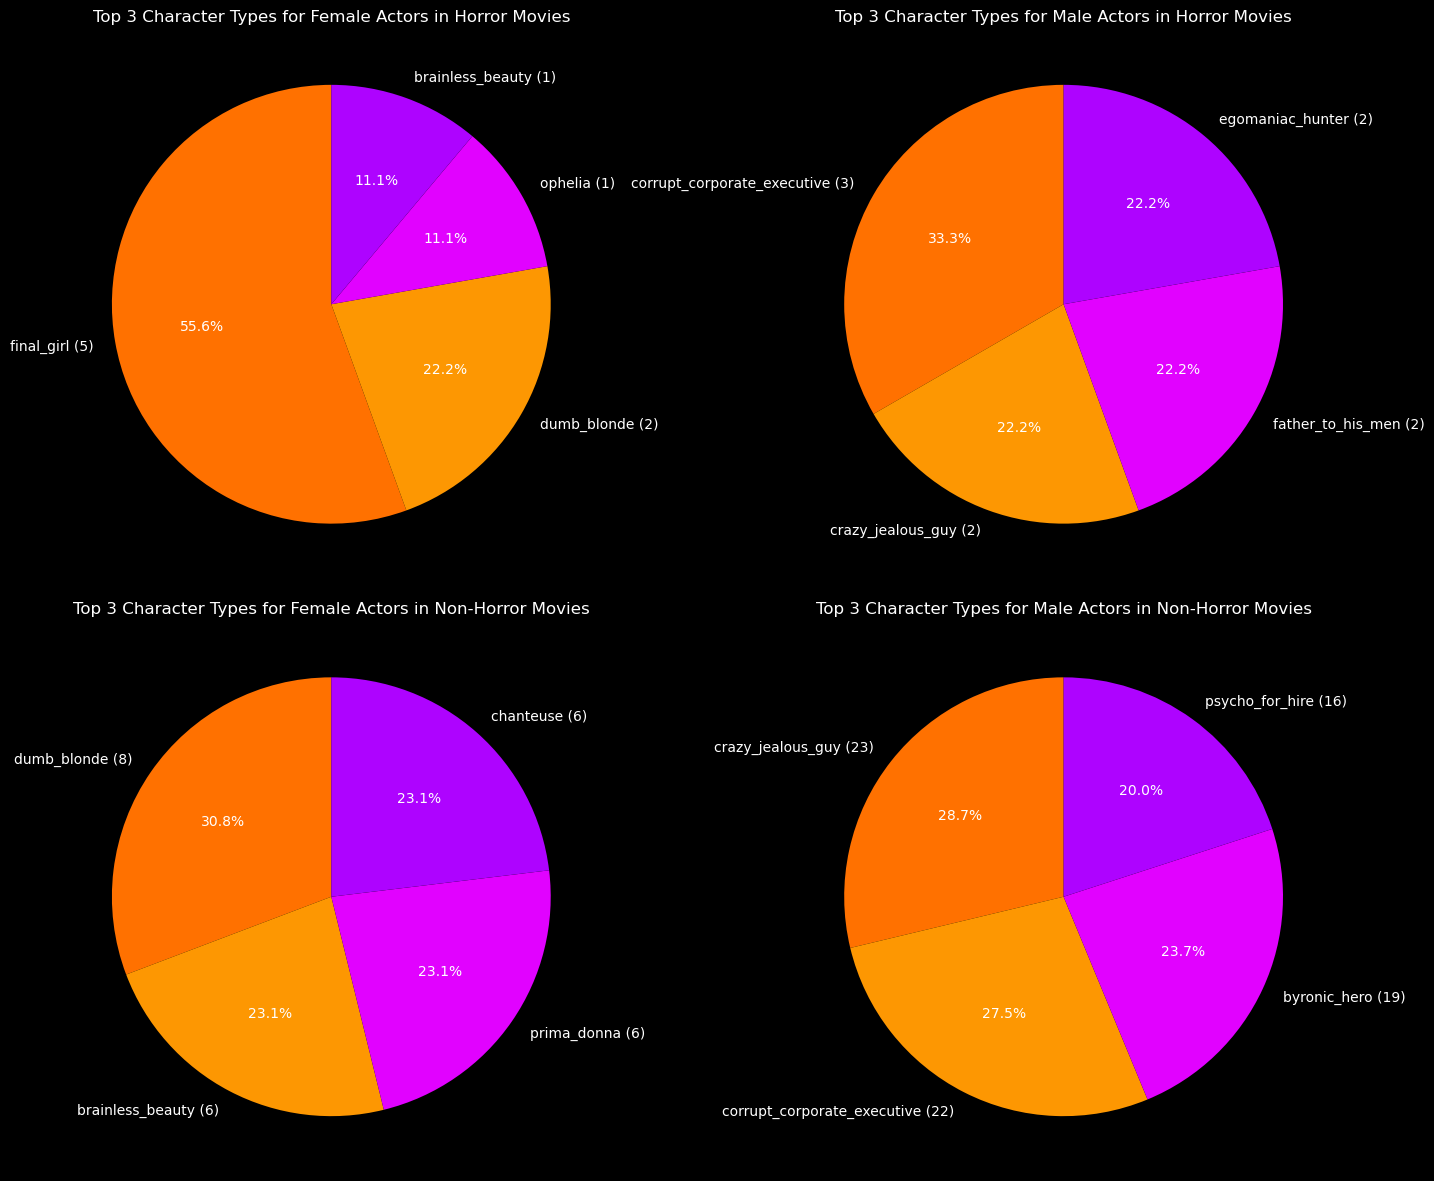

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

colors=[custom_palette[0], custom_palette[1], custom_palette[2], custom_palette[3]]


def get_character_count(df, on_what, what, nb):
    df = df[df[on_what]==what]
    count = df['Character type'].value_counts().nlargest(nb)
    return count

horror_female_counts=get_character_count(horror_movies, 'Actor gender', 'F', 4)
horror_male_counts=get_character_count(horror_movies, 'Actor gender', 'M', 4)
non_horror_female_counts=get_character_count(non_horror_movies, 'Actor gender', 'F', 4)
non_horror_male_counts=get_character_count(non_horror_movies, 'Actor gender', 'M', 4)

# Tracer les diagrammes camemberts
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Diagramme pour les femmes dans les films d'horreur
axs[0, 0].pie(horror_female_counts, labels=[f"{label} ({value})" for label, value in zip(horror_female_counts.index, horror_female_counts)], autopct='%1.1f%%', startangle=90, colors=colors)
axs[0, 0].set_title("Top 3 Character Types for Female Actors in Horror Movies")

# Diagramme pour les hommes dans les films d'horreur
axs[0, 1].pie(horror_male_counts, labels=[f"{label} ({value})" for label, value in zip(horror_male_counts.index, horror_male_counts)], autopct='%1.1f%%', startangle=90, colors=colors)
axs[0, 1].set_title("Top 3 Character Types for Male Actors in Horror Movies")

# Diagramme pour les femmes dans les films non d'horreur
axs[1, 0].pie(non_horror_female_counts, labels=[f"{label} ({value})" for label, value in zip(non_horror_female_counts.index, non_horror_female_counts)], autopct='%1.1f%%', startangle=90, colors=colors)
axs[1, 0].set_title("Top 3 Character Types for Female Actors in Non-Horror Movies")

# Diagramme pour les hommes dans les films non d'horreur
axs[1, 1].pie(non_horror_male_counts, labels=[f"{label} ({value})" for label, value in zip(non_horror_male_counts.index, non_horror_male_counts)], autopct='%1.1f%%', startangle=90, colors=colors)
axs[1, 1].set_title("Top 3 Character Types for Male Actors in Non-Horror Movies")

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()


In [66]:
get_character_count(non_horror_movies, 'real ethnicity', 'African American', 10)

Character type
henpecked_husband              4
dirty_cop                      2
arrogant_kungfu_guy            2
father_to_his_men              1
crazy_survivalist              1
gadgeteer_genius               1
master_swordsman               1
retired_outlaw                 1
corrupt_corporate_executive    1
Name: count, dtype: int64

In [67]:
get_character_count(non_horror_movies, 'real ethnicity', 'White people', 10)

Character type
bruiser_with_a_soft_center     2
henpecked_husband              2
tranquil_fury                  1
klutz                          1
hitman_with_a_heart            1
corrupt_corporate_executive    1
Name: count, dtype: int64

In [83]:
# Extraire les colonnes des titres
tv_titles = tv_tropes['Movie title']
horror_titles = horror_movies['Movie name']
non_horror_titles = non_horror_movies['Movie name']

# Trouver l'intersection des deux ensembles de titres
horror_common_titles = set(tv_titles).intersection(set(horror_titles))
non_horror_common_titles = set(tv_titles).intersection(set(non_horror_titles))

print('Number of movies in horror:', len(horror_titles))
print('Number of movies in non-horror:', len(non_horror_titles))
print('Number of movies in tv_tropes:', len(tv_titles))
print('Number of common movies in horror and tropes:', len(horror_common_titles))
print('Number of common movies in non-horror and tropes:', len(non_horror_common_titles))

Number of movies in horror: 39851
Number of movies in non-horror: 428285
Number of movies in tv_tropes: 501
Number of common movies in horror and tropes: 42
Number of common movies in non-horror and tropes: 350
